In [ ]:
import pandas as pd

import warnings

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt 


# O comando abaixo tira umas mensagens chatas.

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vamos carregar os dois arquivos:

#train=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_train.csv")
#test=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_test.csv")

from google.colab import files
uploaded = files.upload()

Saving store_item_demand_test.csv to store_item_demand_test.csv
Saving store_item_demand_train.csv to store_item_demand_train.csv


In [ ]:
import io

train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']))

# test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']))

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv'])) # Ponho nome no meu dataset de train.

train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d") # Pego a coluna "date" e transformo no formato datetime.

train.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
# Item 1 da store 1.

train_df = train[train['store']==1] # Aqui eu crio a variável "train_df" e dentro seleciono apenas a store 1.
train_df = train_df[train['item']==1] # Aqui já criado a nova variável "train_df" eu escolho o item 1 da store 1.

train_df['year']    = train['date'].dt.year
train_df['month']   = train['date'].dt.month
train_df['day']     = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday

train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


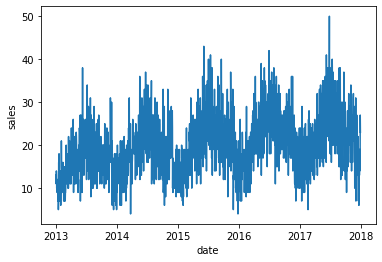

In [ ]:
sns.lineplot(x="date", y="sales",legend = 'full' , data = train_df)


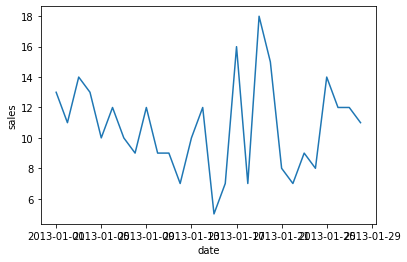

In [ ]:
sns.lineplot(x="date", y="sales",legend = 'full' , data = train_df[:28])


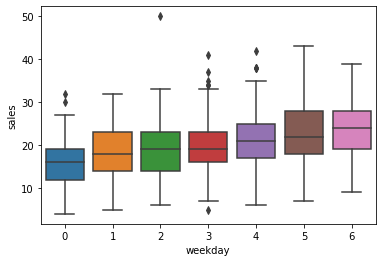

In [ ]:
sns.boxplot(x="weekday", y="sales", data = train_df)


In [ ]:
train_df = train_df.set_index('date')

train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


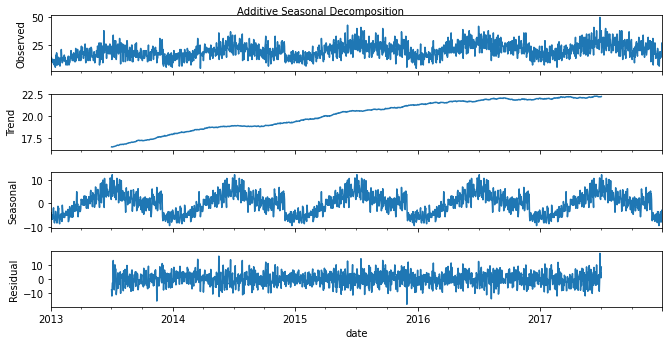

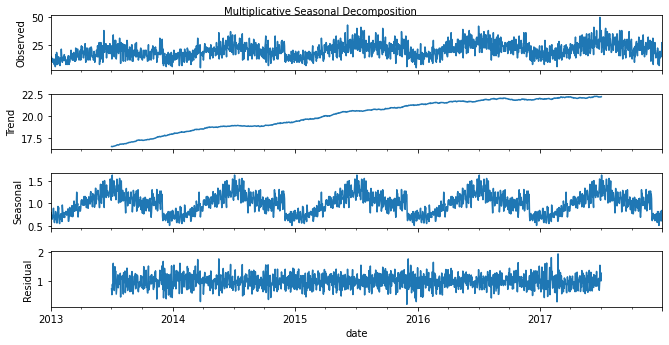

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result1 = seasonal_decompose(train_df['sales'], model='additive', freq=365)

result2 = seasonal_decompose(train_df['sales'], model='multiplicative', freq=365)


fig_1 = result1.plot()
fig_1.suptitle('Additive Seasonal Decomposition', fontsize = 10)
fig_1.set_figheight(5)
fig_1.set_figwidth(10)

fig_2 = result2.plot()
fig_2.suptitle('Multiplicative Seasonal Decomposition', fontsize = 10)
fig_2.set_figheight(5)
fig_2.set_figwidth(10)
plt.show()

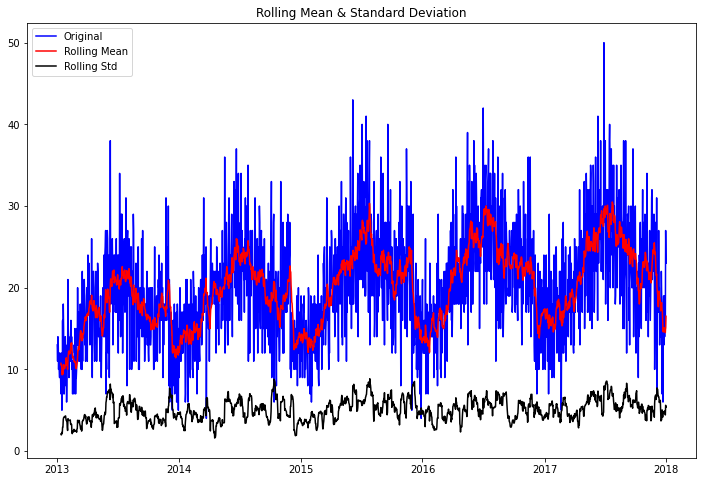

In [ ]:
def test_stationarity(timeseries, window = 12):

    #Criando a média e o desvio padrão:
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

   #Criando o gráfico original:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')

   # Criando o gráfico da média e do desvio padrão:
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

  # Criando a legenda do gráfico:
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(train_df['sales']) # E Aqui o comando para plotar tudo, levando em consideração a coluna "sales" que é o que nos interessa.

In [ ]:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey Fuller Test")

dftest = adfuller(train_df['sales'], autolag = 'AIC') # AIC is a metric

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'No. of observation used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
pvalue = dftest[1]
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic               -3.157671
p-value                       0.022569
#lags used                   23.000000
No. of observation used    1802.000000
Critical Value (1%)          -3.433984
Critical Value (5%)          -2.863145
Critical Value (10%)         -2.567625
dtype: float64
